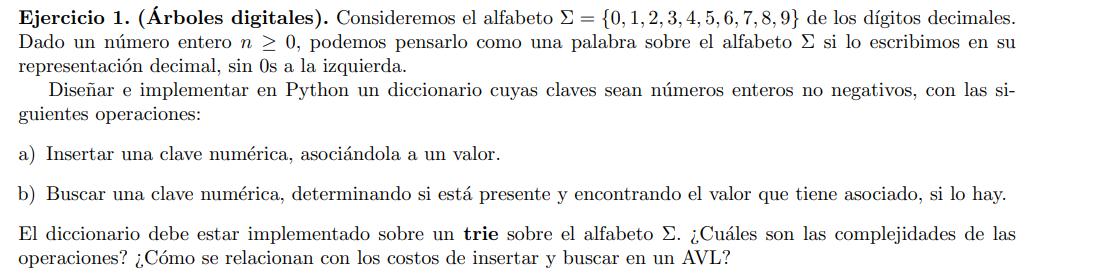

In [ ]:
# Funcion aux para imprimir por pantalla
def imprimir_trie(nodo, nivel=0, digito="*"):
    indent = "  " * nivel
    if nodo.hayClave:
        print(f"{indent}{digito} (clave, valor={nodo.valor})")
    else:
        print(f"{indent}{digito}")
    for d, hijo in enumerate(nodo.hijos):
        if hijo is not None:
            imprimir_trie(hijo, nivel + 1, str(d))

            
ALFABETO = "0123456789"

class Nodo:
    def __init__(self):
        self.hayClave = False
        self.valor = None
        self.hijos = [None for simbolo in ALFABETO]
        
def indice(simbolo):
    return ord(simbolo) - ord('0')

def insertar(trie, clave, valor):
    # la complejidad es O(m), donde m es la longitud de la clave
    nodo = trie
    for simbolo in clave:
        i = indice(simbolo)
        if nodo.hijos[i] is None:
            nodo.hijos[i] = Nodo()
        nodo = nodo.hijos[i]
    nodo.hayClave = True
    nodo.valor = valor

def buscar(trie, clave):
    # la complejidad es O(m), donde m es la longitud de la clave
    nodo = trie
    for simbolo in clave:
        i = indice(simbolo)
        if nodo.hijos[i] is None:
            return (False, None)
        nodo = nodo.hijos[i]
    return (nodo.hayClave, nodo.valor)

a = Nodo()
insertar(a, "123", "valor1")
insertar(a, "456", "valor2")
insertar(a, "124", "valor3")
imprimir_trie(a)

print(buscar(a, "123"))
print(buscar(a, "456"))
print(buscar(a, "789"))


*
  1
    2
      3 (clave, valor=valor1)
      4 (clave, valor=valor3)
  4
    5
      6 (clave, valor=valor2)
(True, 'valor1')
(True, 'valor2')
(False, None)


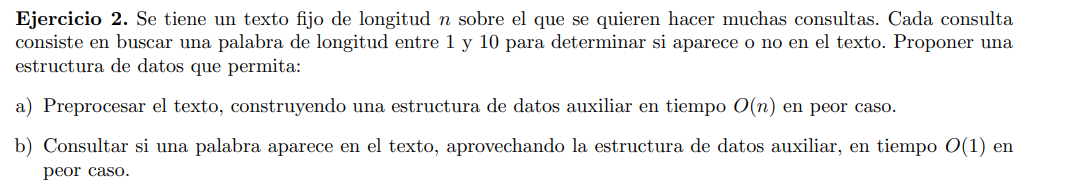

In [ ]:
def preprocesar(texto):
    # Creamos una tabla de hash en O(n)
    substrings = set()
    n = len(texto)
    for i in range(n):
        for l in range(1, 11):  # longitudes de 1 a 10
            if i + l <= n:
                substrings.add(texto[i:i+l])
    return substrings

def consulta(substrings, palabra):
    # consultar en un set en promedio es O(1)
    return palabra in substrings

texto = "abracadabra"
substrings = preprocesar(texto)

print(consulta(substrings, "abra"))   # True
print(consulta(substrings, "cad"))    # True
print(consulta(substrings, "xyz"))    # False


True
True
False


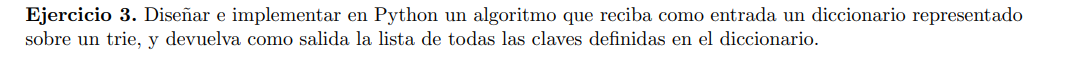

In [14]:
# hacemos un dfs
def listar_claves(trie, prefijo=""):
    claves = []
    
    if trie.hayClave:
        claves.append(prefijo)
    
    for i, hijo in enumerate(trie.hijos):
        if hijo is not None:
            claves.extend(listar_claves(hijo, prefijo + str(i)))
    
    return claves

def listar_claves_iterativo(trie):
    if trie is None:
        return []
    
    claves = []
    # Cada elemento de la pila: (nodo_actual, prefijo_actual)
    pila = [(trie, "")]
    
    while pila:
        nodo, prefijo = pila.pop()
        
        if nodo.hayClave:
            claves.append(prefijo)
        
        for i in reversed(range(len(nodo.hijos))):  # invertir para DFS orden natural
            hijo = nodo.hijos[i]
            if hijo is not None:
                pila.append((hijo, prefijo + str(i)))
    
    return claves

trie = Nodo()
insertar(trie, "123", "hola")
insertar(trie, "45", "mundo")
insertar(trie, "456", "otro")

print(listar_claves(trie))
print(listar_claves_iterativo(trie))

['123', '45', '456']
['123', '45', '456']


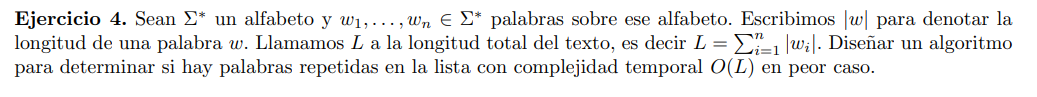

In [ ]:
ALFABETO = "abcdefghijklmnopqrstuvwxyz"

class Nodo:
    def __init__(self):
        self.hayClave = False
        self.valor = None
        self.hijos = [None for simbolo in ALFABETO]

def indice(simbolo):
    return ord(simbolo) - ord('a')


def hay_repetidas(palabras):
    raiz = Nodo()
    
    for palabra in palabras:
        # basicamente hacemos un "insertar"
        nodo = raiz
        for simbolo in palabra:
            i = indice(simbolo)
            if nodo.hijos[i] is None:
                nodo.hijos[i] = Nodo()
            nodo = nodo.hijos[i]
        
        if nodo.hayClave:
            return True  # palabra repetida
        nodo.hayClave = True
    
    return False  # ninguna repetida

palabras = ["hola", "mundo", "python", "hola"]
print(hay_repetidas(palabras))  # True

True
